In [3]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt

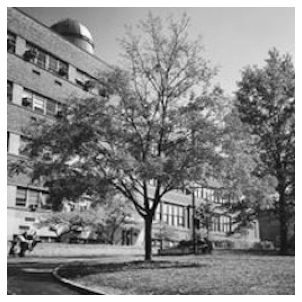

In [2]:
#(1) Making Gray-Scale Image from Color Image(building_color.raw)
def raw_to_rgb(filename, width, height):
    with open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8)
    img = np.reshape(data, (height, width, 3))
    return img

# Convert RGB image to grayscale using the provided formula.
def rgb_to_grayscale(img):
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    return Y.astype(np.uint8)

# Load and convert the image
width, height = 256, 256  # Replace with your image dimensions
img = raw_to_rgb("./Project1_Files/Images/building_color.raw", width, height)
gray_img = rgb_to_grayscale(img)

# Display the grayscale image directly without axes
plt.imshow(gray_img, cmap='gray')
plt.axis('off') 
plt.gca().set_position([0, 0, 1, 1])  # Set the position of the image to fill the whole figure window
plt.show()

# Saving the grayscale image directly without axes
# plt.imshow(gray_img, cmap='gray')
# plt.axis('off')  # Turn off the axes
# plt.gca().set_position([0, 0, 1, 1])  # Set the position of the image to fill the whole figure window
# plt.savefig("./Output/grayscale_building_color.png", bbox_inches='tight', pad_inches=0)
# plt.close()

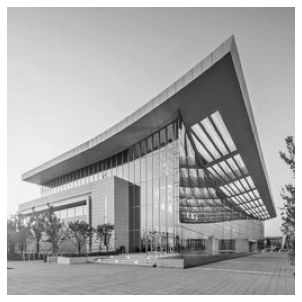

In [3]:
#(1) Making Gray-Scale Image from Color Image (building2_color.raw)
import numpy as np
import matplotlib.pyplot as plt

def raw_to_rgb(filename, width, height):
    """Convert raw file to RGB image."""
    with open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8)
    img = np.reshape(data, (height, width, 3))
    return img

def rgb_to_grayscale(img):
    """Convert RGB image to grayscale using the provided formula."""
    R = img[:,:,0]
    G = img[:,:,1]
    B = img[:,:,2]
    
    Y = 0.299 * R + 0.587 * G + 0.114 * B
    return Y.astype(np.uint8)

# Load and convert the image
width, height = 256, 256  # Replace with your image dimensions
img = raw_to_rgb('./Project1_Files/Images/building2_color.raw', width, height)
gray_img = rgb_to_grayscale(img)

# Display the grayscale image directly without axes
plt.imshow(gray_img, cmap='gray')
plt.axis('off')  # Turn off the axes
plt.gca().set_position([0, 0, 1, 1])  # Set the position of the image to fill the whole figure window
plt.show()

# # Saving the grayscale image directly without axes
# plt.imshow(gray_img, cmap='gray')
# plt.axis('off')  # Turn off the axes
# plt.gca().set_position([0, 0, 1, 1])  # Set the position of the image to fill the whole figure window
# plt.savefig("./Output/grayscale_building2_color.png", bbox_inches='tight', pad_inches=0)
# plt.close()

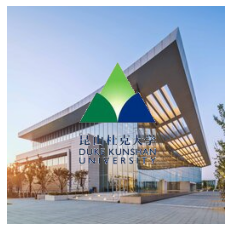

In [4]:
# (2) Embedding Watermarks into Original Image
import numpy as np
import matplotlib.pyplot as plt

# Define the dimensions of your images
width, height = 256, 256  # Replace with the dimensions of 'building2_color.raw'
logo_width, logo_height = 128, 128  # Replace with the dimensions of 'dku_logo_color.raw'

def raw_to_rgb(filepath, width, height):
    # Your actual function implementation here.
    # This is a placeholder function implementation; you should use your actual code.
    return np.fromfile(filepath, dtype=np.uint8).reshape((height, width, 3))

def place_logo(logo, background, threshold, y_offset, x_offset):
    mask = np.sum(logo, axis=2) < threshold
    mask = np.stack([mask]*3, axis=-1)  # Create a 3-channel mask

    background_slice = background[y_offset:y_offset+logo.shape[0], x_offset:x_offset+logo.shape[1]]
    background_slice[mask] = logo[mask]

    return background  # The original background is modified in place

def restore_area(original, modified, y0, y1, x0, x1, offset_y, offset_x):
    modified[offset_y+y0:offset_y+y1, offset_x+x0:offset_x+x1] = original[y0:y1, x0:x1]
    return modified  # The original modified image is updated in place

# Replace the file paths with your actual file paths
img = raw_to_rgb('./Project1_Files/Images/building2_color.raw', width, height)
logo_colour = raw_to_rgb('./Project1_Files/Images/dku_logo_color.raw', logo_width, logo_height)

y_0_0 = 64  # Define your offsets here
x_0_0 = 64
y_0 = 40
y_1 = 70
x_0 = 50
x_1 = 90
thres = 630  # Define your threshold here

# Place the logo onto the image background with a threshold
img_combined = place_logo(logo_colour, img, thres, y_0_0, x_0_0)

# Restore a section of the logo from the original logo image
img_restored = restore_area(logo_colour, img_combined, y_0, y_1, x_0, x_1, y_0_0, x_0_0)

# Display the result
plt.imshow(img_restored)
plt.axis('off')
plt.show()


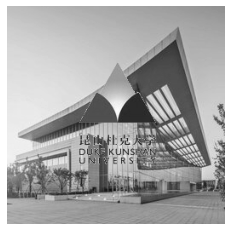

In [5]:
# (2) Embedding Watermarks into Original Image(GrayScale)
#Libraries
import numpy as np
import matplotlib.pyplot as plt
# Define the dimensions of your images
width, height = 256, 256  # Replace with the dimensions of 'building2_color.raw'
logo_width, logo_height = 128, 128  # Replace with the dimensions of 'dku_logo_color.raw'

def raw_to_rgb(filepath, width, height):
    # Your actual function implementation here.
    return np.fromfile(filepath, dtype=np.uint8).reshape((height, width, 3))

def rgb_to_grayscale(rgb_img):
    # Convert to grayscale using the luminosity method
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

def place_logo_gray(logo, background, threshold, y_offset, x_offset):
    # Convert logo to grayscale
    logo_gray = rgb_to_grayscale(logo)
    
    # Create a mask where the logo pixels are below the threshold
    mask = logo_gray < threshold
    
    # Place the grayscale logo onto the grayscale background using the mask
    background_slice = background[y_offset:y_offset+logo_gray.shape[0], x_offset:x_offset+logo_gray.shape[1]]
    background_slice[mask] = logo_gray[mask]

    return background  # The original background is modified in place

def restore_area_gray(original, modified, y0, y1, x0, x1, offset_y, offset_x):
    # Convert the original RGB image to grayscale before restoring
    original_gray = rgb_to_grayscale(original)
    
    # Use slicing to restore the grayscale area from the original to the modified image
    modified[offset_y+y0:offset_y+y1, offset_x+x0:offset_x+x1] = original_gray[y0:y1, x0:x1]

    return modified  # The original modified image is updated in place

# Replace the file paths with your actual file paths
img_rgb = raw_to_rgb('./Project1_Files/Images/building2_color.raw', width, height)
logo_colour = raw_to_rgb('./Project1_Files/Images/dku_logo_color.raw', logo_width, logo_height)

# Convert the main image to grayscale
img_gray = rgb_to_grayscale(img_rgb)

y_0_0 = 64  # Define your offsets here
x_0_0 = 64
y_0 = 40
y_1 = 70
x_0 = 50
x_1 = 90
thres = 210  # Define your threshold here

# Place the grayscale logo onto the grayscale background image with a threshold
img_combined_gray = place_logo_gray(logo_colour, img_gray, thres, y_0_0, x_0_0)

# Restore a section of the logo from the original logo image in grayscale
img_restored_gray = restore_area_gray(logo_colour, img_combined_gray, y_0, y_1, x_0, x_1, y_0_0, x_0_0)

# Display the grayscale result
plt.imshow(img_restored_gray, cmap='gray', vmin=0,vmax=255)
plt.axis('off')
plt.show()


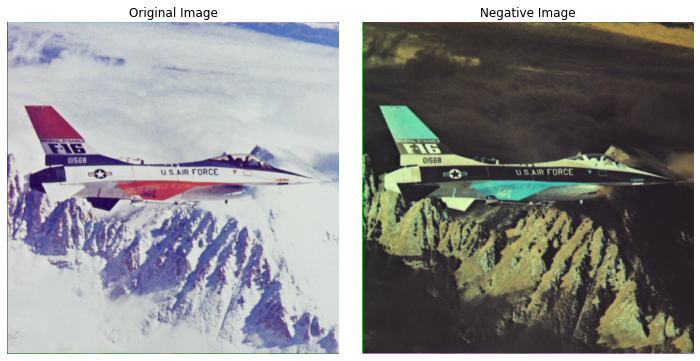

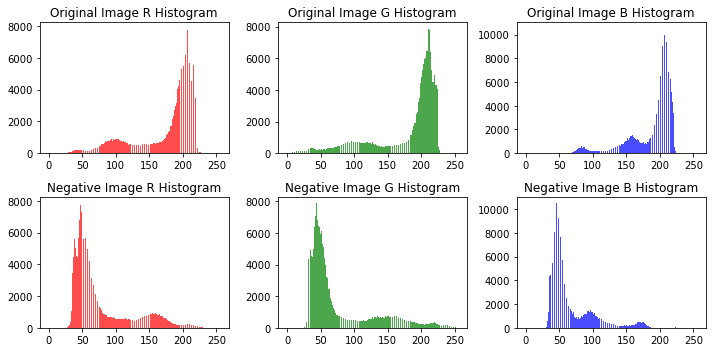

In [6]:
#(3) Generating Negative from Color Image(F-16.raw)
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image data from the file.
with open('./Project1_Files/Images/F-16.raw', 'rb') as f:
    img_data = np.frombuffer(f.read(), dtype=np.uint8)

# 2. Reshape the data to a 512x512 image with 3 channels (R, G, B).
img = img_data.reshape(512, 512, 3)

# 3. Compute the negative image.
negative_img = 255 - img

# 4. Display the original and negative images side by side.
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_img)
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Saving the grayscale image directly without axes
# plt.savefig("./Output/F-16.png", bbox_inches='tight', pad_inches=0)
# plt.close()

# Custom function to compute histogram
def compute_histogram_manual(image_channel):
    histogram = [0] * 256  # A list of 256 zeros
    for row in image_channel:
        for pixel_value in row:
            histogram[pixel_value] += 1
    return histogram

# 5. Plot the color histograms.
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))

for i, color in enumerate(colors):
    original_hist = compute_histogram_manual(img[:,:,i])
    negative_hist = compute_histogram_manual(negative_img[:,:,i])
    
    plt.subplot(2, 3, i+1)
    plt.bar(range(256), original_hist, color=color, alpha=0.7)
    plt.title(f'Original Image {color.upper()} Histogram')
    
    plt.subplot(2, 3, i+4)
    plt.bar(range(256), negative_hist, color=color, alpha=0.7)
    plt.title(f'Negative Image {color.upper()} Histogram')

plt.tight_layout()
plt.show()

# Saving the grayscale image directly without axes
# plt.savefig("./Output/F-16_histogram.png", bbox_inches='tight', pad_inches=0)
# plt.close()


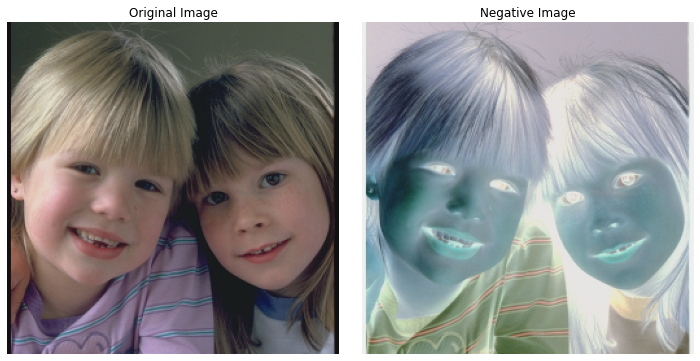

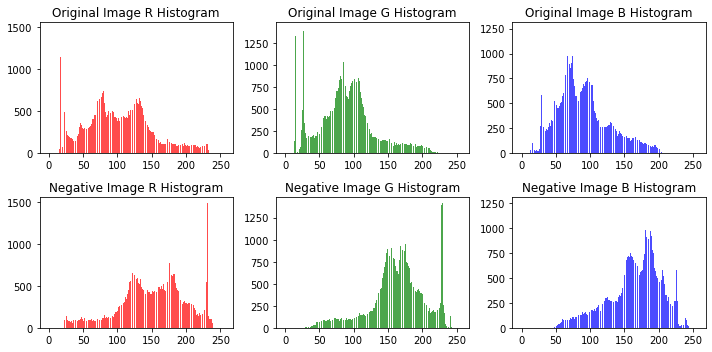

In [7]:
#(3) Generating Negative from Color Image(girls.raw)
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the image data from the file.
with open('./Project1_Files/Images/girls.raw', 'rb') as f:
    img_data = np.frombuffer(f.read(), dtype=np.uint8)

# 2. Reshape the data to a 256x256 image with 3 channels (R, G, B).
img = img_data.reshape(256, 256, 3)

# 3. Compute the negative image.
negative_img = 255 - img

# 4. Display the original and negative images side by side.
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_img)
plt.title('Negative Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Saving the grayscale image directly without axes
# plt.savefig("./Output/girls.png", bbox_inches='tight', pad_inches=0)
# plt.close()

# Custom function to compute histogram
def compute_histogram_manual(image_channel):
    histogram = [0] * 256  # A list of 256 zeros
    for row in image_channel:
        for pixel_value in row:
            histogram[pixel_value] += 1
    return histogram

# 5. Plot the color histograms.
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))

for i, color in enumerate(colors):
    original_hist = compute_histogram_manual(img[:,:,i])
    negative_hist = compute_histogram_manual(negative_img[:,:,i])
    
    plt.subplot(2, 3, i+1)
    plt.bar(range(256), original_hist, color=color, alpha=0.7)
    plt.title(f'Original Image {color.upper()} Histogram')
    
    plt.subplot(2, 3, i+4)
    plt.bar(range(256), negative_hist, color=color, alpha=0.7)
    plt.title(f'Negative Image {color.upper()} Histogram')

plt.tight_layout()
plt.show()

# Saving the grayscale image directly without axes
# plt.savefig("./Output/girls_histogram.png", bbox_inches='tight', pad_inches=0)
# plt.close()
